## Ejercicio manejo de datos y Limpieza

 - Importa los datos de FIFA.csv, Contienen información de jugadores de futbol
 - Realiza una limpieza de datos:
   - ¿De qué formato son nuestras variables? ¿cuántas líneas y columnas tiene el dataset?
   - Cambia las medidas de las variables Weight y Height a Kg y cm
   - Elimina el "+1", "+2"... de las variables CDM, RDM... y todas las columnas que están al final, sin tener que ir una por una. Apóyate en métodos como split, replace...
   - Arregla también las variables W/F, SM, IR
   - Para posteriormente hacer un buen análisis de datos por posición del jugador sería recomendable agrupar o normalizar las posiciones (BP, Best Position) en Portero, Defensa, Mediocampista y delantero. Quizás lo mejor sería crear una función posiciones_jugadores y dependiendo de la BP de cada uno que la nueva variable tome uno de esos 4 valores.
   - También vamos a querer calcular algunas métricas sobre el valor de los jugadores, Transforma las variables Value y Wage de manera que sea un entero y podamos calcular la suma y la media por equipo, posición, nacionalidad...
 - Tratamiento de valores nulos:
   - Localiza las variables que tienen valores nulos y cuenta cuántos tiene cada una de ellas
   - Decide qué hacer con ellos, si eliminarlos, imputarles un valor fijo, imputarles un valor en función de alguna condición...
 - Valores extremos
   - Localiza si las variables numéricas toman valores demasiado elevados o bajos, usa la función describe y pinta gráficos
   - Si existe alguno que sea absurdo (por ejemplo una altura en negativo) corrígelo. Si no, trátalo de la manera que más nos convenga para un futuro análisis exploratorio, por ejemplo limítalo a un valor más bajo.
 - Análisis descriptivo
   - Una vez tenemos nuestros datos limpios de irregularidades, de valores nulos y erróneos podemos emepezar a analizar su contenido
   - Compara las variables numéricas en función de variables categóricas, como su posición. Respóndete a preguntas tales como qué jugadores son más caros, más altos... Para ello representa una tabla con la suma, la media y la cuenta para cada posición. También dibuja un gráfico que consideres el más conveniente para analizar la misma información visualmente. 
   - OVA representa una valoración general del jugador, analiza si tiene alguna relación con otras columnas referentes a la calidad como Attacking, Defending... A mayor OVA mayor Value?

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

In [156]:
df_fifa = pd.read_csv('../Data/fifa.csv')

In [157]:
df_fifa.describe
#With the describe method we obtain information about the number of rows and columns.

<bound method NDFrame.describe of        Unnamed: 0      ID           Name  Age  Nationality  \
0            1954  184383      A. Pasche   26  Switzerland   
1            2225  188044  Alan Carvalho   30     China PR   
2            1959  184431    S. Giovinco   33        Italy   
3            9815  233796       J. Evans   22        Wales   
4           10074  234799     Y. Demoncy   23       France   
...           ...     ...            ...  ...          ...   
13695       11284  239074          S. Aw   21      Senegal   
13696       11964  241223        S. Mogi   21        Japan   
13697        5390  210930     Carles Gil   27        Spain   
13698         860  162993       J. Perch   34      England   
13699       15795  254882  A. Oeynhausen   18      Germany   

                             Club   BP   Position  \
0               FC Lausanne-Sport   CM     CM CDM   
1         Beijing Sinobo Guoan FC   ST   ST LW LM   
2                        Al Hilal  CAM     CAM CF   
3        

In [158]:
df_fifa.info(102)
#With the method we can obtain information about the type of variables 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13700 entries, 0 to 13699
Data columns (total 102 columns):
 #    Column            Dtype  
---   ------            -----  
 0    Unnamed: 0        int64  
 1    ID                int64  
 2    Name              object 
 3    Age               int64  
 4    Nationality       object 
 5    Club              object 
 6    BP                object 
 7    Position          object 
 8    Team & Contract   object 
 9    Height            object 
 10   Weight            object 
 11   foot              object 
 12   Growth            int64  
 13   Joined            object 
 14   Loan Date End     object 
 15   Value             object 
 16   Wage              object 
 17   Release Clause    object 
 18   Contract          object 
 19   Attacking         int64  
 20   Crossing          int64  
 21   Finishing         int64  
 22   Heading Accuracy  int64  
 23   Short Passing     int64  
 24   Volleys           float64
 25   Skill             in

In [159]:
df_fifa[['Height']]

,Height
0,"5'9"""
1,"6'0"""
2,"5'4"""
3,"5'10"""
4,"5'11"""
...,...
13695,"5'8"""
13696,"6'5"""
13697,"5'7"""
13698,"5'11"""


In [160]:
df_fifa[['Weight']]

,Weight
0,161lbs
1,159lbs
2,134lbs
3,152lbs
4,150lbs
...,...
13695,143lbs
13696,176lbs
13697,146lbs
13698,176lbs


In [161]:
df_fifa[['Height','Weight']]

,Height,Weight
0,"5'9""",161lbs
1,"6'0""",159lbs
2,"5'4""",134lbs
3,"5'10""",152lbs
4,"5'11""",150lbs
...,...,...
13695,"5'8""",143lbs
13696,"6'5""",176lbs
13697,"5'7""",146lbs
13698,"5'11""",176lbs


In [162]:
import re

def height_to_cm(height):
    match = re.match(r"(\d+)'(\d+)", height) 
    if match:
        foots = int(match.group(1))
        inches = int(match.group(2))
        cms = foots * 30.48 + inches * 2.54 
        return(cms)
    return None

df_fifa['Height'] = df_fifa['Height'].apply(height_to_cm)

df_fifa[['Height','Weight']]

,Height,Weight
0,175.26,161lbs
1,182.88,159lbs
2,162.56,134lbs
3,177.80,152lbs
4,180.34,150lbs
...,...,...
13695,172.72,143lbs
13696,195.58,176lbs
13697,170.18,146lbs
13698,180.34,176lbs


In [163]:
import re

def weight_to_kg(weight):
    match = re.match(r"(\d+)lbs", weight)  # Extraer el número
    if match:
        lbs = int(match.group(1))
        return round(lbs * 0.453592, 2)  # Conversión
    return None

# Aplicar la función
df_fifa['Weight'] = df_fifa['Weight'].apply(weight_to_kg)

df_fifa[['Height','Weight']]

,Height,Weight
0,175.26,73.03
1,182.88,72.12
2,162.56,60.78
3,177.80,68.95
4,180.34,68.04
...,...,...
13695,172.72,64.86
13696,195.58,79.83
13697,170.18,66.22
13698,180.34,79.83


In [164]:
df_fifa.head()

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,175.26,...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",182.88,...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,1959,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,162.56,...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,9815,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,177.80,...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,10074,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,180.34,...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [165]:
df_fifa = df_fifa.replace(r'\+\d+', '', regex=True)

# Ver las primeras filas para confirmar el cambio
df_fifa.head()

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,175.26,...,59,59,59,58,54,54,54,58,15,64
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",182.88,...,53,53,57,53,48,48,48,53,18,77
2,1959,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,162.56,...,56,56,59,53,41,41,41,53,12,80
3,9815,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,177.80,...,58,58,56,57,58,58,58,57,14,59
4,10074,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,180.34,...,64,64,64,63,61,61,61,63,15,65


In [166]:
print(df_fifa[['W/F', 'SM', 'IR']].head())


   W/F  SM   IR
0  4 ★  2★  1 ★
1  3 ★  4★  2 ★
2  4 ★  4★  2 ★
3  2 ★  2★  1 ★
4  2 ★  3★  1 ★


In [167]:
df_fifa.replace({' ★': '', '★': ''}, regex=True, inplace=True)
print(df_fifa[['W/F', 'SM', 'IR']].head())  

  W/F SM IR
0   4  2  1
1   3  4  2
2   4  4  2
3   2  2  1
4   2  3  1


In [168]:
print(df_fifa['W/F'].unique())
print(df_fifa['SM'].unique())   
print(df_fifa['IR'].unique())   

['4' '3' '2' '5' '1']
['2' '4' '3' '1' '5']
['1' '2' '3' '5' '4']


In [169]:
for i, col in enumerate(df_fifa.columns):
    print(f"{i}: {col}")


0: Unnamed: 0
1: ID
2: Name
3: Age
4: Nationality
5: Club
6: BP
7: Position
8: Team & Contract
9: Height
10: Weight
11: foot
12: Growth
13: Joined
14: Loan Date End
15: Value
16: Wage
17: Release Clause
18: Contract
19: Attacking
20: Crossing
21: Finishing
22: Heading Accuracy
23: Short Passing
24: Volleys
25: Skill
26: Dribbling
27: Curve
28: FK Accuracy
29: Long Passing
30: Ball Control
31: Movement
32: Acceleration
33: Sprint Speed
34: Agility
35: Reactions
36: Balance
37: Power
38: Shot Power
39: Jumping
40: Stamina
41: Strength
42: Long Shots
43: Mentality
44: Aggression
45: Interceptions
46: Positioning
47: Vision
48: Penalties
49: Composure
50: Defending
51: Marking
52: Standing Tackle
53: Sliding Tackle
54: Goalkeeping
55: GK Diving
56: GK Handling
57: GK Kicking
58: GK Positioning
59: GK Reflexes
60: Total Stats
61: Base Stats
62: W/F
63: SM
64: A/W
65: D/W
66: IR
67: PAC
68: SHO
69: PAS
70: DRI
71: DEF
72: PHY
73: Hits
74: LS
75: ST
76: RS
77: LW
78: LF
79: CF
80: RF
81: RW
8

In [170]:
print(df_fifa[['BP']].head())


    BP
0   CM
1   ST
2  CAM
3  CDM
4  CDM


In [171]:
def posiciones_jugadores(bp):
    """Asigna una posición general basada en la mejor posición del jugador (BP)."""
    posiciones = {
        'GK': 'Portero',
        'RB': 'Defensa', 'CB': 'Defensa', 'LB': 'Defensa',
        'RWB': 'Defensa', 'LWB': 'Defensa',
        'CM': 'Mediocampista', 'CAM': 'Mediocampista', 'CDM': 'Mediocampista',
        'LM': 'Mediocampista', 'RM': 'Mediocampista',
        'ST': 'Delantero', 'RW': 'Delantero', 'LW': 'Delantero', 'CF': 'Delantero'
    }
    return posiciones.get(bp, 'Desconocido')  # Si BP no está en el diccionario, asigna 'Desconocido'
df_fifa['Posición General'] = df_fifa['BP'].apply(posiciones_jugadores)

print(df_fifa[['BP', 'Posición General']].head(10))
print(df_fifa['Posición General'].value_counts())  # Contar cuántos jugadores hay en cada categoría




    BP Posición General
0   CM    Mediocampista
1   ST        Delantero
2  CAM    Mediocampista
3  CDM    Mediocampista
4  CDM    Mediocampista
5   LM    Mediocampista
6   RB          Defensa
7   LM    Mediocampista
8   CB          Defensa
9   CB          Defensa
Posición General
Mediocampista    5359
Defensa          4405
Delantero        2655
Portero          1281
Name: count, dtype: int64


In [172]:
print(df_fifa['Posición General'].unique())


['Mediocampista' 'Delantero' 'Defensa' 'Portero']


In [173]:
print(df_fifa['Value'].unique())
print(df_fifa['Wage'].unique())


['€525K' '€8.5M' '€9M' '€275K' '€725K' '€1.4M' '€6M' '€300K' '€210K'
 '€220K' '€625K' '€650K' '€800K' '€5M' '€130K' '€1.1M' '€325K' '€825K'
 '€500K' '€350K' '€1M' '€475K' '€160K' '€675K' '€14.5M' '€900K' '€0'
 '€425K' '€450K' '€60K' '€10M' '€1.8M' '€750K' '€700K' '€1.5M' '€16.5M'
 '€6.5M' '€180K' '€2.6M' '€41M' '€600K' '€200K' '€3.2M' '€44M' '€2.7M'
 '€4.5M' '€875K' '€7.5M' '€110K' '€11.5M' '€975K' '€2.3M' '€550K' '€170K'
 '€850K' '€925K' '€775K' '€80K' '€3.3M' '€575K' '€375K' '€1.3M' '€1.2M'
 '€3.5M' '€1.9M' '€190K' '€250K' '€19.5M' '€100K' '€90K' '€5.5M' '€4.2M'
 '€140K' '€400K' '€2.9M' '€4.4M' '€2M' '€240K' '€4.6M' '€230K' '€7M'
 '€2.8M' '€13.5M' '€4.3M' '€8M' '€4.8M' '€20.5M' '€150K' '€9.5M' '€2.1M'
 '€120K' '€3.6M' '€15.5M' '€12.5M' '€3.4M' '€2.5M' '€1.7M' '€41.5M'
 '€1.6M' '€2.4M' '€13M' '€14M' '€3.9M' '€3M' '€12M' '€15M' '€950K' '€4M'
 '€10.5M' '€3.8M' '€70K' '€2.2M' '€28.5M' '€50K' '€25K' '€3.1M' '€23M'
 '€30M' '€4.9M' '€34.5M' '€31.5M' '€25.5M' '€4.7M' '€18.5M' '€42M' '€34M'
 

In [174]:
import pandas as pd

# Función para convertir valores monetarios en enteros
def convertir_valores(valor):
    if isinstance(valor, str):
        valor = valor.replace('€', '')
        if 'M' in valor:
            return int(float(valor.replace('M', '')) * 1_000_000)
        elif 'K' in valor:
            return int(float(valor.replace('K', '')) * 1_000)
        else:
            return int(valor)
    return 0

# Aplicar la conversión a las columnas Value y Wage
df_fifa['Value'] = df_fifa['Value'].apply(convertir_valores)
df_fifa['Wage'] = df_fifa['Wage'].apply(convertir_valores)

# Verificar la transformación
print(df_fifa[['Value', 'Wage']].head(10))
print(df_fifa.dtypes)



     Value   Wage
0   525000   4000
1  8500000  23000
2  9000000  49000
3   275000   4000
4   725000   2000
5  1400000  11000
6  6000000  28000
7   300000    800
8   210000   2000
9   220000   4000
Unnamed: 0           int64
ID                   int64
Name                object
Age                  int64
Nationality         object
                     ...  
RCB                 object
RB                  object
GK                  object
OVA                  int64
Posición General    object
Length: 103, dtype: object


In [175]:
print(df_fifa.isnull().sum()[df_fifa.isnull().sum() > 0])

Club                 21
Position            343
Joined               44
Loan Date End     12961
Volleys              44
Curve                44
Agility              44
Balance              44
Jumping              44
Interceptions         7
Positioning           7
Vision               44
Composure           329
Sliding Tackle       44
A/W                  67
D/W                  67
dtype: int64


In [176]:
print(df_fifa['Interceptions'].unique())


[52. 33. 26. 57. 60. 38. 77. 69. 67. 70. 20. 56. 25. 16. 68. 21. 65.  8.
 18. 22. 35. 17. 41. 63. 23. 29. 40. 32. 42. 15. 19. 59. 30. 74. 50. 27.
 72. 81. 13. 62. 31. 86. 43. 64. 10. 37. 28. 51. 39. 44. 53. 66. 79. 73.
 11. 61. 75. 78. 48. 55. 49. 24. 76. 58. 45. 71. 14. 84. 54. 36.  7. 47.
 12. 34.  6. 85. 80. 82.  9. 46. 89. 90. 83. 87. nan 91.  5. 88. 95.  4.]


In [177]:
# 1️⃣ Imputar "Sin Club" en jugadores sin equipo
df_fifa['Club'] = df_fifa['Club'].fillna('Sin Club')

# 2️⃣ Imputar "Unknown" en posiciones vacías (o eliminar si es necesario)
df_fifa['Position'] = df_fifa['Position'].fillna('Unknown')

# 3️⃣ Imputar "Desconocido" en la fecha de ingreso
df_fifa['Joined'] = df_fifa['Joined'].fillna('Desconocido')

# 4️⃣ Eliminar la columna "Loan Date End" (casi todos son nulos)
df_fifa = df_fifa.drop(columns=['Loan Date End'])

# 5️⃣ Imputar atributos técnicos con la media
cols_media = ['Volleys', 'Curve', 'Agility', 'Balance', 'Jumping', 'Vision', 'Composure', 'Sliding Tackle']
df_fifa[cols_media] = df_fifa[cols_media].apply(lambda x: x.fillna(x.mean()))

# 6️⃣ Imputar "Interceptions" y "Positioning" con la media por posición
df_fifa['Interceptions'] = df_fifa.groupby('Posición General')['Interceptions'].transform(lambda x: x.fillna(x.mean()))
df_fifa['Positioning'] = df_fifa.groupby('Posición General')['Positioning'].transform(lambda x: x.fillna(x.mean()))

# 7️⃣ Imputar "A/W" y "D/W" con la moda (valor más común)
df_fifa['A/W'] = df_fifa['A/W'].fillna(df_fifa['A/W'].mode()[0])
df_fifa['D/W'] = df_fifa['D/W'].fillna(df_fifa['D/W'].mode()[0])

# Verificar si quedan valores nulos
print(df_fifa.isnull().sum())


Unnamed: 0          0
ID                  0
Name                0
Age                 0
Nationality         0
                   ..
RCB                 0
RB                  0
GK                  0
OVA                 0
Posición General    0
Length: 102, dtype: int64


In [178]:
print(df_fifa.isnull().sum()[df_fifa.isnull().sum() > 0])


Series([], dtype: int64)


In [179]:
for i, col in enumerate(df_fifa.columns):
    print(f"{i}: {col} - {df_fifa[col].dtype}")

0: Unnamed: 0 - int64
1: ID - int64
2: Name - object
3: Age - int64
4: Nationality - object
5: Club - object
6: BP - object
7: Position - object
8: Team & Contract - object
9: Height - float64
10: Weight - float64
11: foot - object
12: Growth - int64
13: Joined - object
14: Value - int64
15: Wage - int64
16: Release Clause - object
17: Contract - object
18: Attacking - int64
19: Crossing - int64
20: Finishing - int64
21: Heading Accuracy - int64
22: Short Passing - int64
23: Volleys - float64
24: Skill - int64
25: Dribbling - int64
26: Curve - float64
27: FK Accuracy - int64
28: Long Passing - int64
29: Ball Control - int64
30: Movement - int64
31: Acceleration - int64
32: Sprint Speed - int64
33: Agility - float64
34: Reactions - int64
35: Balance - float64
36: Power - int64
37: Shot Power - int64
38: Jumping - float64
39: Stamina - int64
40: Strength - int64
41: Long Shots - int64
42: Mentality - int64
43: Aggression - int64
44: Interceptions - float64
45: Positioning - float64
46: V

In [180]:
df_fifa.describe(percentiles=[0.01, 0.10, 0.25, 0.75, 0.80, 0.99])

,Unnamed: 0,ID,Age,Height,Weight,Growth,Value,Wage,Attacking,Crossing,...,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY,OVA
count,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,1.370000e+04,13700.000000,13700.000000,13700.000000,...,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000
mean,8561.641971,219378.929708,25.286058,181.225848,75.133339,5.509927,2.549592e+06,10442.233577,258.313431,51.585766,...,15.830292,1630.103942,361.317007,68.108832,55.056423,58.931679,64.236277,50.123577,64.860219,66.945912
std,4954.144383,37445.343736,4.944498,6.893956,7.171942,5.797176,5.294546e+06,21054.511967,72.412379,17.899930,...,17.276491,260.986045,40.258414,11.183342,13.839958,10.159851,9.816203,16.815110,9.736964,6.860189
min,1.000000,16.000000,16.000000,154.940000,53.070000,-1.000000,0.000000e+00,0.000000,33.000000,6.000000,...,1.000000,731.000000,228.000000,26.000000,17.000000,25.000000,28.000000,12.000000,27.000000,38.000000
1%,173.980000,34816.550000,17.000000,165.100000,59.870000,0.000000,0.000000e+00,0.000000,59.000000,10.000000,...,5.000000,885.000000,271.000000,34.000000,25.000000,34.000000,36.000000,19.000000,40.000000,51.000000
10%,1707.900000,181861.400000,19.000000,172.720000,66.220000,0.000000,1.600000e+05,500.000000,167.000000,24.000000,...,6.000000,1277.900000,308.000000,54.000000,33.000000,45.000000,51.000000,26.000000,51.000000,58.000000
25%,4269.750000,203979.750000,21.000000,175.260000,69.850000,0.000000,3.750000e+05,1000.000000,231.000000,41.000000,...,8.000000,1491.000000,333.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000,62.000000
50%,8555.500000,228927.000000,25.000000,180.340000,74.840000,4.000000,8.000000e+05,3000.000000,271.000000,56.000000,...,11.000000,1659.000000,362.000000,69.000000,58.000000,60.000000,65.000000,53.000000,66.000000,67.000000
75%,12887.250000,244043.500000,29.000000,185.420000,79.830000,9.000000,2.400000e+06,10000.000000,306.000000,65.000000,...,14.000000,1811.250000,389.000000,75.000000,65.000000,66.000000,71.000000,64.000000,72.000000,72.000000
80%,13720.400000,246670.200000,30.000000,187.960000,81.190000,11.000000,3.200000e+06,14000.000000,314.000000,67.000000,...,14.000000,1845.000000,396.000000,77.000000,67.000000,68.000000,72.000000,66.000000,73.000000,73.000000


In [181]:
#hacer un histograma de wages / values
#boxplot de analisis de la distribución
#Para los outliers de value/wage - hacer los dos ejemplos, un grafico quitando los outliers por arriba o por arriba y por abajo y otro grafico poniendo que los que tienen mas del 99% le hemos puesto el salario/value del 99.
# Intenta encontrar el top 10 jugadores que ofreceria a florentino perez (el precio puede ser extremo)
# Intenta encontrar el top 10 jugadores que ofreceria con un precio rango entre 100-300K



In [182]:
df_fifa.describe(percentiles=[0.01, 0.10, 0.25, 0.75, 0.80, 0.99])


,Unnamed: 0,ID,Age,Height,Weight,Growth,Value,Wage,Attacking,Crossing,...,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY,OVA
count,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,1.370000e+04,13700.000000,13700.000000,13700.000000,...,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000
mean,8561.641971,219378.929708,25.286058,181.225848,75.133339,5.509927,2.549592e+06,10442.233577,258.313431,51.585766,...,15.830292,1630.103942,361.317007,68.108832,55.056423,58.931679,64.236277,50.123577,64.860219,66.945912
std,4954.144383,37445.343736,4.944498,6.893956,7.171942,5.797176,5.294546e+06,21054.511967,72.412379,17.899930,...,17.276491,260.986045,40.258414,11.183342,13.839958,10.159851,9.816203,16.815110,9.736964,6.860189
min,1.000000,16.000000,16.000000,154.940000,53.070000,-1.000000,0.000000e+00,0.000000,33.000000,6.000000,...,1.000000,731.000000,228.000000,26.000000,17.000000,25.000000,28.000000,12.000000,27.000000,38.000000
1%,173.980000,34816.550000,17.000000,165.100000,59.870000,0.000000,0.000000e+00,0.000000,59.000000,10.000000,...,5.000000,885.000000,271.000000,34.000000,25.000000,34.000000,36.000000,19.000000,40.000000,51.000000
10%,1707.900000,181861.400000,19.000000,172.720000,66.220000,0.000000,1.600000e+05,500.000000,167.000000,24.000000,...,6.000000,1277.900000,308.000000,54.000000,33.000000,45.000000,51.000000,26.000000,51.000000,58.000000
25%,4269.750000,203979.750000,21.000000,175.260000,69.850000,0.000000,3.750000e+05,1000.000000,231.000000,41.000000,...,8.000000,1491.000000,333.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000,62.000000
50%,8555.500000,228927.000000,25.000000,180.340000,74.840000,4.000000,8.000000e+05,3000.000000,271.000000,56.000000,...,11.000000,1659.000000,362.000000,69.000000,58.000000,60.000000,65.000000,53.000000,66.000000,67.000000
75%,12887.250000,244043.500000,29.000000,185.420000,79.830000,9.000000,2.400000e+06,10000.000000,306.000000,65.000000,...,14.000000,1811.250000,389.000000,75.000000,65.000000,66.000000,71.000000,64.000000,72.000000,72.000000
80%,13720.400000,246670.200000,30.000000,187.960000,81.190000,11.000000,3.200000e+06,14000.000000,314.000000,67.000000,...,14.000000,1845.000000,396.000000,77.000000,67.000000,68.000000,72.000000,66.000000,73.000000,73.000000


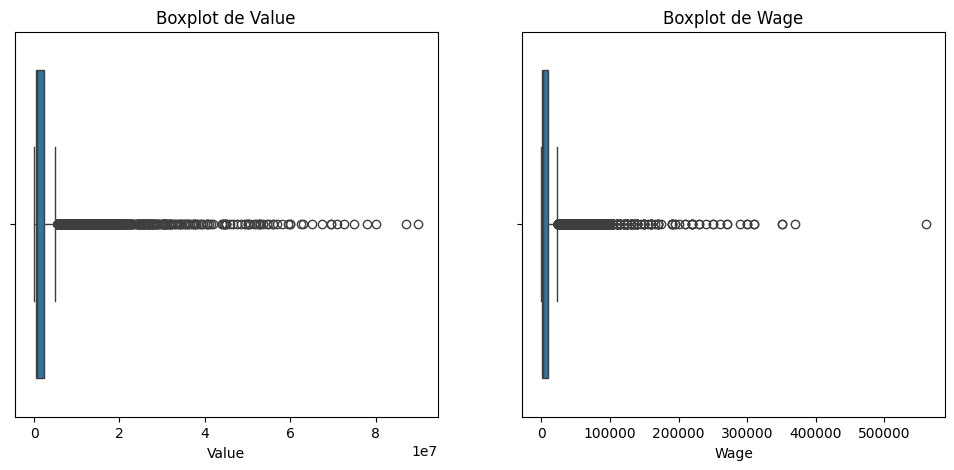

In [183]:
plt.figure(figsize=(12, 5))

# Boxplot para Value
plt.subplot(1, 2, 1)
sns.boxplot(x=df_fifa["Value"])
plt.title("Boxplot de Value")

# Boxplot para Wage
plt.subplot(1, 2, 2)
sns.boxplot(x=df_fifa["Wage"])
plt.title("Boxplot de Wage")

plt.show()




Vemos que hemos de trabajar los outliers.

In [184]:
#Detectamos cuantos outliers hay según la regla del rango intercuantilico
Q1 = df_fifa[['Value', 'Wage']].quantile(0.25)
Q3 = df_fifa[['Value', 'Wage']].quantile(0.75)
IQR = Q3 - Q1

limites_inferiores = Q1 - 1.5 * IQR
limites_superiores = Q3 + 1.5 * IQR

outliers = (df_fifa[['Value', 'Wage']] < limites_inferiores) | (df_fifa[['Value', 'Wage']] > limites_superiores)
print(df_fifa[outliers.any(axis=1)][['Value', 'Wage']])


          Value    Wage
1       8500000   23000
2       9000000   49000
6       6000000   28000
27     14500000   14000
28      9000000   16000
...         ...     ...
13675   6500000   23000
13677   6500000   15000
13679  10500000   62000
13685  37000000  150000
13697   8000000    9000

[2316 rows x 2 columns]


Vemos que hay 2316 jugadores que son outliers en value y/o en wage.


In [185]:
# Calcular Q1, Q3 e IQR
Q1 = df_fifa[['Value', 'Wage']].quantile(0.25)
Q3 = df_fifa[['Value', 'Wage']].quantile(0.75)
IQR = Q3 - Q1

# Definir límites inferior y superior para detectar valores atípicos
limites_inferiores = Q1 - 1.5 * IQR
limites_superiores = Q3 + 1.5 * IQR

# Crear una máscara booleana para detectar outliers
outliers_value = (df_fifa['Value'] < limites_inferiores['Value']) | (df_fifa['Value'] > limites_superiores['Value'])
outliers_wage = (df_fifa['Wage'] < limites_inferiores['Wage']) | (df_fifa['Wage'] > limites_superiores['Wage'])

# Contar cuántos jugadores son outliers en ambas variables
outliers_ambos = (outliers_value & outliers_wage).sum()

print(f"Número de jugadores con valores atípicos en ambas columnas (Value y Wage): {outliers_ambos}")



Número de jugadores con valores atípicos en ambas columnas (Value y Wage): 1108


Vemos que parece haber une elevada correlacion entre wage y value.

In [186]:
correlacion = df_fifa["Wage"].corr(df_fifa["Value"])
print(f"Correlación entre Wage y Value: {correlacion:.4f}")


Correlación entre Wage y Value: 0.8202


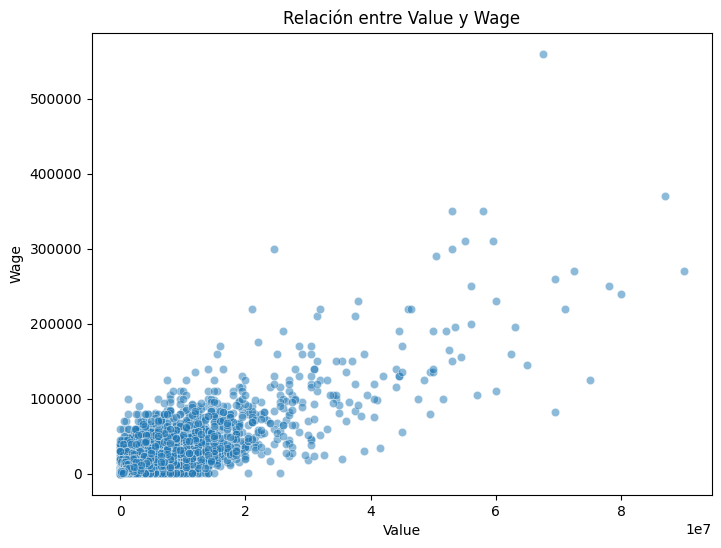

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_fifa["Value"], y=df_fifa["Wage"], alpha=0.5)
plt.title("Relación entre Value y Wage")
plt.xlabel("Value")
plt.ylabel("Wage")
plt.show()


Efectivamente vemos en el grafico una elevada correlación.

In [188]:
print(df_fifa[['Value']].describe())
print(df_fifa[['Wage']].describe())

              Value
count  1.370000e+04
mean   2.549592e+06
std    5.294546e+06
min    0.000000e+00
25%    3.750000e+05
50%    8.000000e+05
75%    2.400000e+06
max    9.000000e+07
                Wage
count   13700.000000
mean    10442.233577
std     21054.511967
min         0.000000
25%      1000.000000
50%      3000.000000
75%     10000.000000
max    560000.000000


In [189]:
print(df_fifa.dtypes[['Value', 'Wage']])


Value    int64
Wage     int64
dtype: object


In [190]:
# Winsorizamos y aseguramos que el resultado sea un array NumPy
df_fifa["Value_winsor_1"] = np.array(winsorize(df_fifa["Value"].values, limits=[0.01, 0.01]))
df_fifa["Wage_winsor_1"] = np.array(winsorize(df_fifa["Wage"].values, limits=[0.01, 0.01]))

# Revisamos si la winsorización tuvo efecto
print(df_fifa[['Value', 'Value_winsor_1']].describe())
print(df_fifa[['Wage', 'Wage_winsor_1']].describe())

              Value  Value_winsor_1
count  1.370000e+04    1.370000e+04
mean   2.549592e+06    2.401089e+06
std    5.294546e+06    4.115807e+06
min    0.000000e+00    0.000000e+00
25%    3.750000e+05    3.750000e+05
50%    8.000000e+05    8.000000e+05
75%    2.400000e+06    2.400000e+06
max    9.000000e+07    2.550000e+07
                Wage  Wage_winsor_1
count   13700.000000   13700.000000
mean    10442.233577    9871.576642
std     21054.511967   16244.017068
min         0.000000       0.000000
25%      1000.000000    1000.000000
50%      3000.000000    3000.000000
75%     10000.000000   10000.000000
max    560000.000000   96000.000000


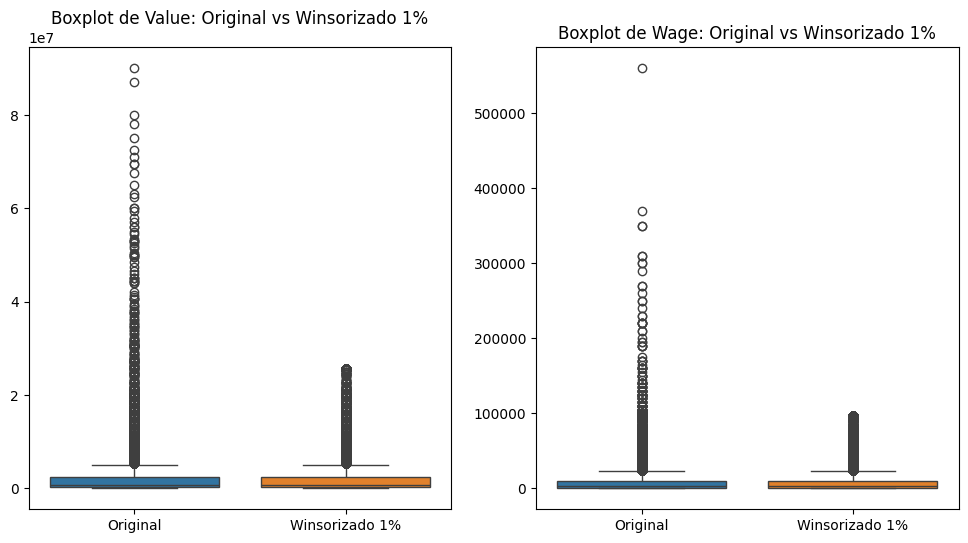

In [191]:
#Comparemos los graficos winsorizando al 1%.

plt.figure(figsize=(12, 6))

# Boxplot para Value antes y después de winsorización al 1%
plt.subplot(1, 2, 1)
sns.boxplot(data=[df_fifa["Value"], df_fifa["Value_winsor_1"]])
plt.xticks([0, 1], ["Original", "Winsorizado 1%"])
plt.title("Boxplot de Value: Original vs Winsorizado 1%")

# Boxplot para Wage antes y después de winsorización al 1%
plt.subplot(1, 2, 2)
sns.boxplot(data=[df_fifa["Wage"], df_fifa["Wage_winsor_1"]])
plt.xticks([0, 1], ["Original", "Winsorizado 1%"])
plt.title("Boxplot de Wage: Original vs Winsorizado 1%")

plt.show()


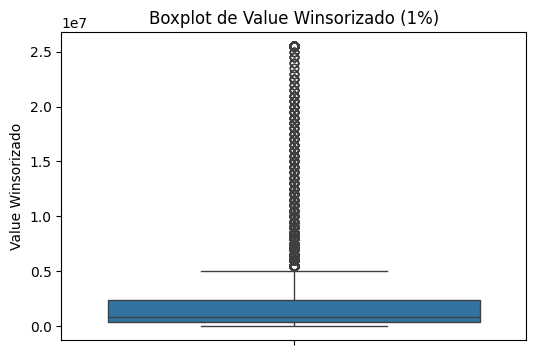

In [192]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_fifa["Value_winsor_1"])
plt.title("Boxplot de Value Winsorizado (1%)")
plt.ylabel("Value Winsorizado")
plt.show()

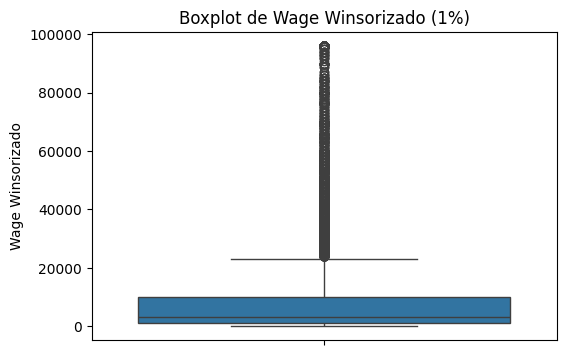

In [193]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_fifa["Wage_winsor_1"])
plt.title("Boxplot de Wage Winsorizado (1%)")
plt.ylabel("Wage Winsorizado")
plt.show()


In [196]:
# Winsorizamos y aseguramos que el resultado sea un array NumPy
df_fifa["Value_winsor_5"] = np.array(winsorize(df_fifa["Value"].values, limits=[0.05, 0.05]))
df_fifa["Wage_winsor_5"] = np.array(winsorize(df_fifa["Wage"].values, limits=[0.05, 0.05]))

# Revisamos si la winsorización tuvo efecto
print(df_fifa[['Value', 'Value_winsor_5']].describe())
print(df_fifa[['Wage', 'Wage_winsor_5']].describe())

              Value  Value_winsor_5
count  1.370000e+04    1.370000e+04
mean   2.549592e+06    2.083114e+06
std    5.294546e+06    2.833737e+06
min    0.000000e+00    9.000000e+04
25%    3.750000e+05    3.750000e+05
50%    8.000000e+05    8.000000e+05
75%    2.400000e+06    2.400000e+06
max    9.000000e+07    1.050000e+07
                Wage  Wage_winsor_5
count   13700.000000   13700.000000
mean    10442.233577    8711.448905
std     21054.511967   11699.121844
min         0.000000     500.000000
25%      1000.000000    1000.000000
50%      3000.000000    3000.000000
75%     10000.000000   10000.000000
max    560000.000000   44000.000000


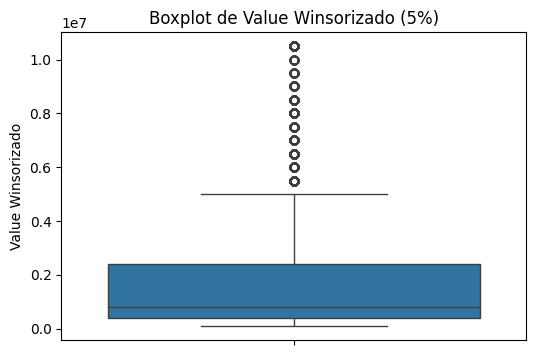

In [197]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_fifa["Value_winsor_5"])
plt.title("Boxplot de Value Winsorizado (5%)")
plt.ylabel("Value Winsorizado")
plt.show()

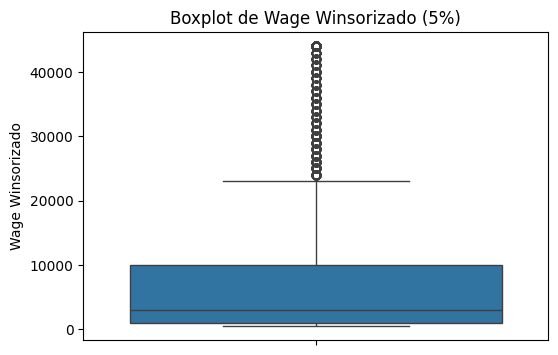

In [198]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_fifa["Wage_winsor_5"])
plt.title("Boxplot de Wage Winsorizado (5%)")
plt.ylabel("Wage Winsorizado")
plt.show()


Interpretamos que aun winsorizando al 5% sigue habiendo un numero relevante de outliers y unos pocos jugadores tienen salarios mucho mas elevados que la media etc.

In [200]:
df_fifa.columns = df_fifa.columns.str.strip()  # Elimina espacios en nombres de columnas


In [206]:
# Filtrar jugadores con OVA alto y buen crecimiento
df_top_fichajes = df_fifa[(df_fifa["OVA"] >= 85) & (df_fifa["Growth"] >= 5)]

# Ordenar por OVA, Growth y Value
df_top_fichajes = df_top_fichajes.sort_values(by=["OVA", "Growth", "Value"], ascending=[False, False, False]).head(10)

# Crear gráfico de dispersión con Plotly
fig = px.scatter(
    df_top_fichajes,
    x="Wage",               # Salario en el eje X
    y="Value",              # Valor de mercado en el eje Y
    size="OVA",             # Tamaño del punto según la OVA
    color="BP",             # Color según la mejor posición (Best Position)
    hover_name="Name",      # Mostrar el nombre del jugador al pasar el mouse
    hover_data=["Age", "Growth", "Club"],  # Info extra en el hover
    title="Top 10 Jugadores para el Real Madrid",
    labels={"Wage": "Salario", "Value": "Valor de Mercado", "OVA": "Valoración General", "BP": "Mejor Posición"},
)

# Mostrar gráfico interactivo
fig.show()

